In [3]:
%matplotlib inline

## Matplotlib

- gráficos en 2D de matrices

## Numpy

- matrices

## Pandas

- análisis de datos

## Scikit-image

- procesamiento de imágenes


# Pandas

In [4]:
# construcción del nombre del archivo a procesar
miDirectorio = './datos/'
nombreArchivo = 'registro1.txt'
archivoDatos = miDirectorio + nombreArchivo

# apertura, lectura y cierre del archivo
file = open(archivoDatos, 'r')
lineas = file.readlines()
file.close()

# a partir de la lista de datos construimos dos listas: tiempo y voltaje
tiempo =  [float(t.split('\t')[0].replace(',', '.')) for t in lineas]
voltaje = [float(t.split('\t')[1].replace(',', '.')) for t in lineas]

In [5]:
# Se muestran los primeros valores
print("TIEMPO")
print("Tamaño total: ", len(tiempo))
print("Tiempos:", tiempo[:20])
print("------------------------------------")
print("VOLTAJE")
print("Tamaño total: ", len(voltaje))
print("Tiempos:", voltaje[:20])


TIEMPO
Tamaño total:  359
Tiempos: [284.405, 284.41, 284.415, 284.42, 284.425, 284.43, 284.435, 284.44, 284.445, 284.45, 284.455, 284.46, 284.465, 284.47, 284.475, 284.48, 284.485, 284.49, 284.495, 284.5]
------------------------------------
VOLTAJE
Tamaño total:  359
Tiempos: [0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.101, 0.102, 0.103, 0.104, 0.104, 0.105, 0.106, 0.106, 0.106, 0.105, 0.105, 0.104, 0.103, 0.102]


# Con Pandas

In [6]:
import pandas as pd
# pd.options.display.max_columns= 60
pd.options.display.max_rows= 10
pd.options.display.notebook_repr_html = True

# construcción del nombre del archivo a procesar
miDirectorio = './datos/'
nombreArchivo = 'registro1.txt'
archivoDatos = miDirectorio + nombreArchivo

registro = pd.read_csv(archivoDatos, sep='\t', names=['tiempo','voltaje'], decimal=',')

# Estructura de datos: dataframe

| **Index** | Columna 1 | Columna 2 |
| :---: | :-------: | :-------: |
| **1** | valor 1 | valor a |
| **2** | valor 2 | valor b |
| ... | ... | ... |
| **N** | valor | valor |

Se puede determinar que una columna sea el índice utilizando:

``` python

pd.read_csv(archivoDatos, index_col='Columna 1')
```

| **Columna 1** | Columna 2 |
| :-------: | :-------: |
| **valor 1** | valor a |
| **valor 2** | valor b |
| **...** | ... |
| **valor** | valor |


In [7]:
registro

,tiempo,voltaje
0,284.405,0.101
1,284.410,0.101
2,284.415,0.101
3,284.420,0.101
4,284.425,0.101
...,...,...
354,286.175,0.097
355,286.180,0.097
356,286.185,0.097
357,286.190,0.097


In [8]:
registro.describe()

,tiempo,voltaje
count,359.000000,359.000000
mean,285.300000,0.290760
std,0.518893,0.467566
min,284.405000,0.071000
25%,284.852500,0.086000
50%,285.300000,0.101000
75%,285.747500,0.105500
max,286.195000,1.819000


In [9]:
registro['voltaje']

0      0.101
1      0.101
2      0.101
3      0.101
4      0.101
       ...  
354    0.097
355    0.097
356    0.097
357    0.097
358    0.097
Name: voltaje, dtype: float64

In [10]:
registro['voltaje'][358]

0.096999999999999989

# Graficación

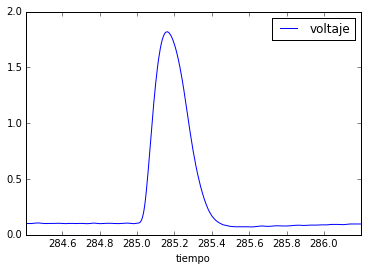

In [11]:
registro.plot('tiempo', 'voltaje')

# Procesamiento

## Hallar la duración de la señal al 50% del máximo

## Buscamos el máximo

In [12]:
maximo = registro['voltaje'].max()
ubicacionMaximo = registro['voltaje'].idxmax()
print("El máximo es {0} y corresponde al elemento {1}".format(maximo, ubicacionMaximo))

El máximo es 1.819 y corresponde al elemento 151


# Estimación del valor en reposo

In [13]:
reposo = registro['voltaje'][0:50].mean()
print("El valor en reposo es {0:.5f} aprox".format(reposo))

El valor en reposo es 0.10232 aprox


# Ancho a la mitad del máximo (FWHM)

In [14]:
mitadMaximo = reposo + (maximo - reposo) / 2
print("la mitad de la amplitud máxima es {0:.5f}".format(mitadMaximo))

la mitad de la amplitud máxima es 0.96066


# Operaciones sobre una columna (sin bucle for)

In [15]:
registro['voltaje'] > mitadMaximo

0      False
1      False
2      False
3      False
4      False
       ...  
354    False
355    False
356    False
357    False
358    False
Name: voltaje, dtype: bool

In [16]:
registro['por encima del 50%'] = registro['voltaje'] > mitadMaximo
registro[ubicacionMaximo:]

,tiempo,voltaje,por encima del 50%
151,285.160,1.819,True
152,285.165,1.818,True
153,285.170,1.812,True
154,285.175,1.802,True
155,285.180,1.789,True
...,...,...,...
354,286.175,0.097,False
355,286.180,0.097,False
356,286.185,0.097,False
357,286.190,0.097,False


In [17]:
indicesPorEncimaDe50 = registro[registro['por encima del 50%']==True].index
indicesPorEncimaDe50

Int64Index([135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
            148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
            161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
            174, 175],
           dtype='int64')

## continuará...